# Conversion Rate Analysis

## Explortary Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


In [7]:
df = pd.read_csv('conversion_data.csv')

In [5]:
df.head()
#Here we can see we have country, age, new_user, source and total_pages_visited info to predict the conversion.

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
df.describe()
# There are 316200 records, and converstion rate is around 17.7%

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


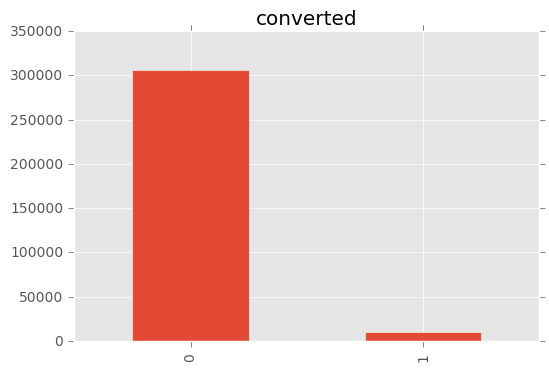

In [6]:
df.converted.value_counts().plot(kind = 'bar')
plt.title('converted')

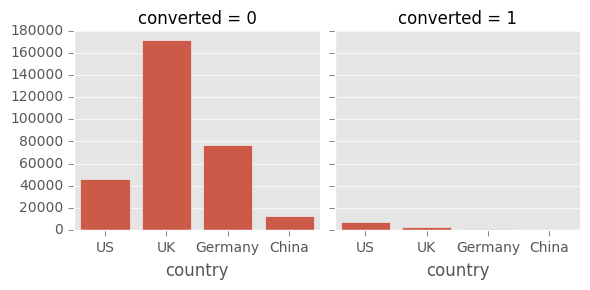

In [7]:
sns.FacetGrid(df, col='converted').map(sns.countplot,'country')

We can see in the plot that even there are many users in Germany and China, they don't become converted. Also, given the large user base in UK, the conversion rate is very low.

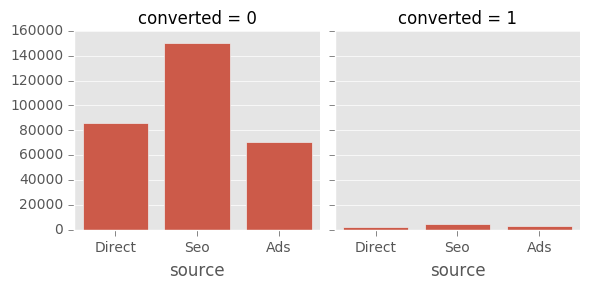

In [8]:
sns.FacetGrid(df, col='converted').map(sns.countplot,'source')

In [9]:
df.groupby(['converted','source']).count()

country     age  new_user  total_pages_visited
converted source                                                
0         Ads       85680   85680     85680                85680
          Direct    70380   70380     70380                70380
          Seo      149940  149940    149940               149940
1         Ads        3060    3060      3060                 3060
          Direct     2040    2040      2040                 2040
          Seo        5100    5100      5100                 5100

In [10]:
3060.00/(85680+3060)#Ads

0.034482758620689655

In [11]:
2040.00/(70380+2040)#Direct

0.028169014084507043

In [12]:
5100.00/(149940+5100)#Seo

0.03289473684210526

Ads seems the most efficient way to drive conversion among 3 sources.

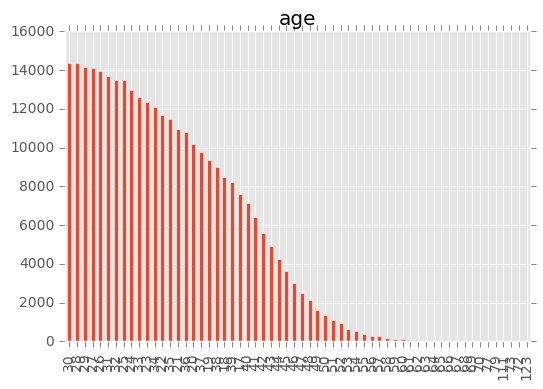

In [13]:
df.age.value_counts().plot(kind = 'bar')
plt.title('age')

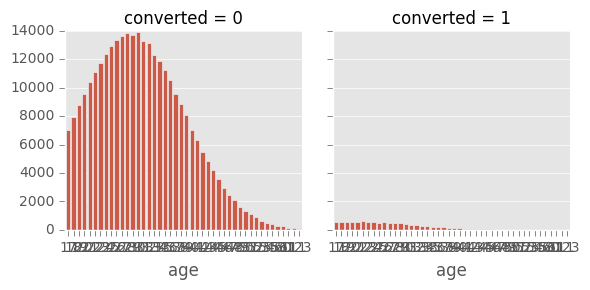

In [14]:
sns.FacetGrid(df, col='converted').map(sns.countplot,'age')

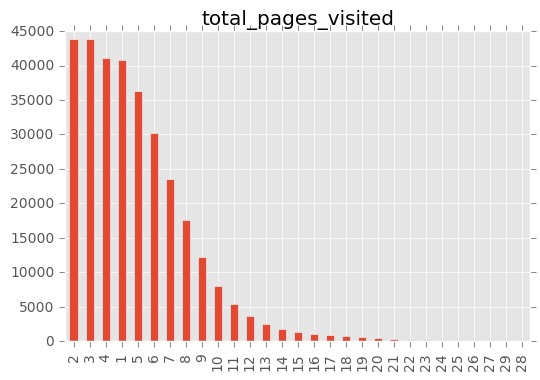

In [15]:
df.total_pages_visited.value_counts().plot(kind = 'bar')
plt.title('total_pages_visited')

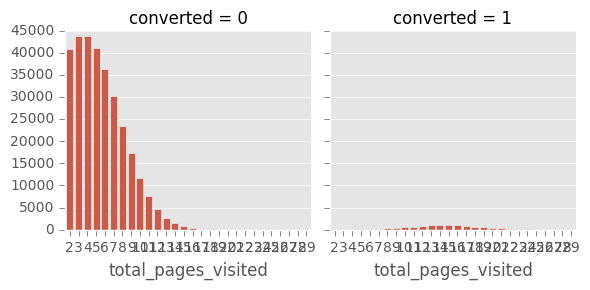

In [16]:
sns.FacetGrid(df, col='converted').map(sns.countplot,'total_pages_visited')

From this plot, we can easily see that people who visited around 14 pages in total are more likely to be converted.

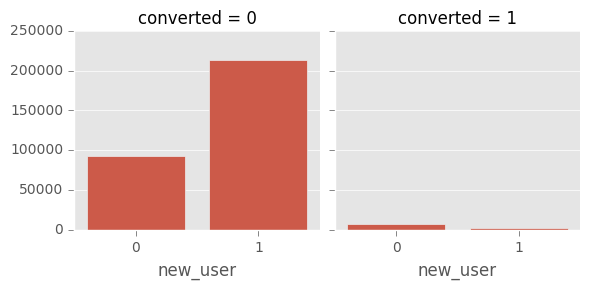

In [17]:
sns.FacetGrid(df, col='converted').map(sns.countplot,'new_user')

This plot shows that new users are less likely to be converted.

To summarize the exploratary analysis, my hypothesis is that new_user, total_pages_visited and country are most important features to predict whether the user will be converted. 

## Predictive Analysis

In [18]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [8]:
df_cty = pd.get_dummies(df.country,prefix = 'country')

In [9]:
df1 = pd.concat([df,df_cty],axis = 1)
df1.head()

,country,age,new_user,source,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US
0,UK,25,1,Ads,1,0,0,0,1,0
1,US,23,1,Seo,5,0,0,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0
4,US,30,1,Seo,6,0,0,0,0,1


In [10]:
df_sr = pd.get_dummies(df.source,prefix = 'source')
df2 = pd.concat([df1,df_sr],axis = 1)
df2.head()

,country,age,new_user,source,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,1


In [11]:
del df2['country']
del df2['source']
df2.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [12]:
df2.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [13]:
X = df2.drop('converted',axis = 1)
y = df2['converted']

In [14]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [14]:

from sklearn.tree import DecisionTreeClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

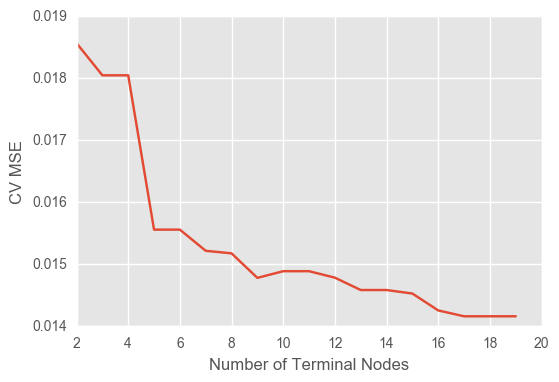

In [38]:
Maximum_Terminal_Nodes = range(2,20)
score = []
for i in Maximum_Terminal_Nodes :
        tree = DecisionTreeClassifier(max_leaf_nodes = i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24) 
        score.append(-cross_val_score(tree, X, y, cv=10, scoring = 'neg_mean_squared_error').mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()

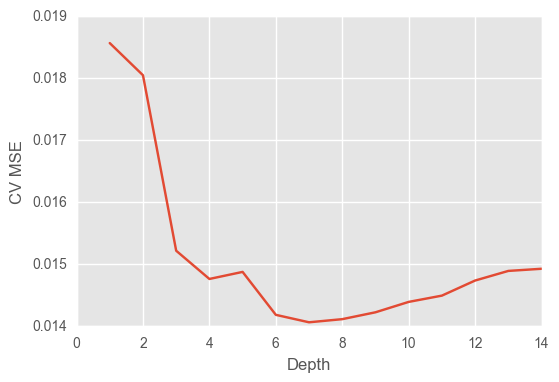

In [39]:
Maximum_Depth = range(1,15)
score = []
for i in Maximum_Depth:
        tree = DecisionTreeClassifier(max_depth= i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  
        score.append(-cross_val_score(tree, X, y, cv=10, scoring = 'neg_mean_squared_error').mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV MSE")
plt.show()

In [15]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size = 0.3)

In [17]:
dec = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 5, 10, 20],
              'max_depth': [6,7,8],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [16,17,18]}

grid_search_dec = GridSearchCV(dec, parameters,scoring = 'accuracy')


grid_search_dec.fit(features_train, labels_train)

print ("Accuracy score", grid_search_dec.score(features_test,labels_test))

from sklearn.metrics import recall_score,precision_score
pred = grid_search_dec.predict(features_test)
recall = recall_score(labels_test,pred)
precision = precision_score(labels_test,pred)

print ("Precision:", precision)
print ("Recall:", recall)

Accuracy score 0.986032047227
Precision: 0.858870967742
Recall: 0.685990338164


C:\Users\Ruofei\Anaconda3\lib\site-packages\sklearn\grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [18]:
dec = DecisionTreeClassifier(**grid_search_dec.best_params_)
dec.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=18, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

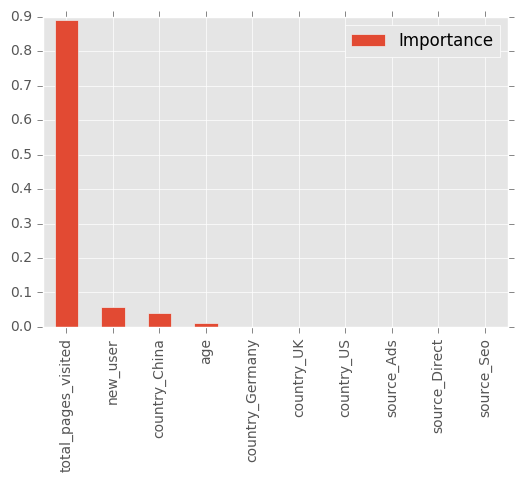

In [21]:

importance = dec.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')

After tuning and parameters and refiting the model, we can see that we are able to achieve 98.56% accuracy. In this decision tree model, we can see that total_pages_visited, new_user and country_China are the most important features in this model. My hypothesis from the exploratary analysis are proved by decision tree model.

In [45]:
from sklearn.externals import joblib
joblib.dump(dec, 'dec.pkl') 

['dec.pkl']

In [4]:
dec = joblib.load('dec.pkl') 

In [3]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.externals import joblib

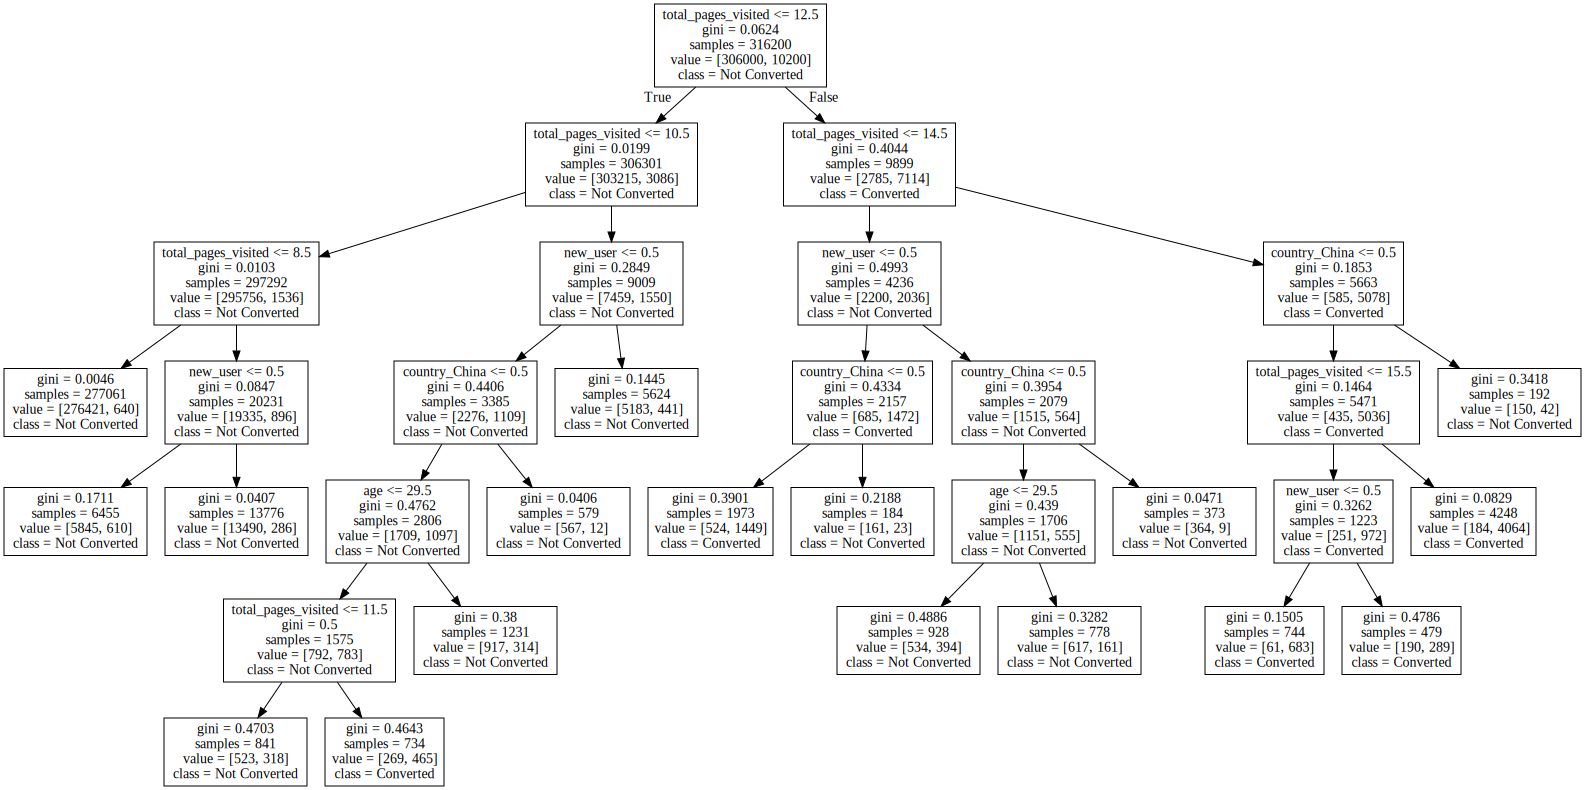

In [16]:
Source(export_graphviz(dec, out_file=None, feature_names=X.columns, class_names = ['Not Converted','Converted']))

From the decision tree graph, we can easily see what kind of users are more likely to make a conversion.
* Total visited pages larger than 12.5 are more likely to make a conversion. It makes sense that people intend to browse more about what they want before they make a decision. Those people must consider to buy something seriously. For those who have already visited more than 12.5 pages, we could retarget/email marketing them to encourage them make a decision.
* China users are a big issue. Looks like if the user from China, then it will never make a conversion. There may be something wrong with the Chinese version of the website.
* We can see from the decision tree that old users are more likely to be converted. I would recommand to do retargeting for the old users. Also, if we could have more data about our old users, we can dive into and segment our old users to make the retargeting more accurately.
* People under age 30 are more likely to make a conversion. We should reflect our business strategy - are we intended to attract more young people? If not, which age group are we going after for? Then based on the strategy to make some change on the website.